Importing modules

In [42]:
import pandas as pd
import glob
from matplotlib import pyplot as plt

import datetime
import os
import string

## Citi Bike Data

Concatenating all bike rental data into one dataframe

In [43]:
path = '/Users/ethanenkhtur/Documents/Codecademy/bike-rental-starter-kit/data/JC*'

csv_files = glob.glob(path)

dataframes = []

for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)
    
df = pd.concat(dataframes, ignore_index=True)

In [44]:
df['id'] = df.index

In [45]:
df.head(3)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,id
0,361,2016-02-01 00:31:18,2016-02-01 00:37:19,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24393,Subscriber,1975.0,1,0
1,297,2016-02-01 01:55:05,2016-02-01 02:00:02,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24394,Subscriber,1985.0,2,1
2,1155,2016-02-01 02:40:05,2016-02-01 02:59:20,3183,Exchange Place,40.716247,-74.033459,3210,Pershing Field,40.742677,-74.051789,24676,Subscriber,1976.0,1,2


How much missing data there is

In [46]:
df.isna().sum()

Trip Duration                  0
Start Time                     0
Stop Time                      0
Start Station ID               0
Start Station Name             0
Start Station Latitude         0
Start Station Longitude        0
End Station ID                 0
End Station Name               0
End Station Latitude           0
End Station Longitude          0
Bike ID                        0
User Type                    380
Birth Year                 18999
Gender                         0
id                             0
dtype: int64

In [47]:
df.dtypes

Trip Duration                int64
Start Time                  object
Stop Time                   object
Start Station ID             int64
Start Station Name          object
Start Station Latitude     float64
Start Station Longitude    float64
End Station ID               int64
End Station Name            object
End Station Latitude       float64
End Station Longitude      float64
Bike ID                      int64
User Type                   object
Birth Year                 float64
Gender                       int64
id                           int64
dtype: object

DataFrame could use some fixing in terms of each column being of right type such as start and stop time.

Let's do that!

In [48]:
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['Stop Time'] = pd.to_datetime(df['Stop Time'])
df.dtypes

Trip Duration                       int64
Start Time                 datetime64[ns]
Stop Time                  datetime64[ns]
Start Station ID                    int64
Start Station Name                 object
Start Station Latitude            float64
Start Station Longitude           float64
End Station ID                      int64
End Station Name                   object
End Station Latitude              float64
End Station Longitude             float64
Bike ID                             int64
User Type                          object
Birth Year                        float64
Gender                              int64
id                                  int64
dtype: object

In [49]:
df.describe()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender,id
count,2.475840e+05,247584,247584,247584.000000,247584.000000,247584.000000,247584.000000,247584.000000,247584.000000,247584.000000,228585.000000,247584.000000,247584.000000
mean,8.856305e+02,2016-07-29 05:55:07.541335296,2016-07-29 06:09:53.671073792,3207.065206,40.723121,-74.046438,3203.572553,40.722594,-74.045855,24935.260481,1979.335276,1.123534,123791.500000
min,6.100000e+01,2016-01-01 00:02:52,2016-01-01 00:08:54,3183.000000,40.692640,-74.096937,147.000000,40.692216,-74.096937,14552.000000,1900.000000,0.000000,0.000000
25%,2.480000e+02,2016-05-27 07:46:06,2016-05-27 07:54:40.249999872,3186.000000,40.717732,-74.050656,3186.000000,40.716540,-74.050444,24491.000000,1974.000000,1.000000,61895.750000
50%,3.900000e+02,2016-08-10 09:23:50,2016-08-10 09:34:32.500000,3201.000000,40.721525,-74.044247,3199.000000,40.721124,-74.043117,24609.000000,1981.000000,1.000000,123791.500000
75%,6.660000e+02,2016-10-05 17:25:05.500000,2016-10-05 17:33:00.750000128,3211.000000,40.727596,-74.038051,3211.000000,40.727224,-74.036486,24719.000000,1986.000000,1.000000,185687.250000
max,1.632981e+07,2016-12-31 23:44:50,2017-01-18 14:26:46,3426.000000,40.752559,-74.032108,3426.000000,40.801343,-73.957390,27274.000000,2000.000000,2.000000,247583.000000
std,3.593798e+04,NaN,NaN,26.955103,0.008199,0.011211,61.579494,0.007958,0.011283,748.469712,9.596809,0.518687,71471.488861


##### Columns to investigate further:

- `Birth Year` (suspiciously small minimum, missing data)
- `User Type` (missing data)
- `Trip Duration` (suspiciously large maximum)
- `Gender` (what are the unknowns)

First some housekeeping to remove spaces and uppercase letters from the column names.

In [50]:
# updating column names
df.columns = [x.replace(' ','_').lower() for x in df.columns]

### Investigation of `birth_year`

In [51]:
df['age'] = 2016 - df.birth_year.values
df['age'].sort_values(ascending=False)[:10]

186245    116.0
31008      82.0
72509      79.0
184757     79.0
173695     79.0
157596     79.0
226979     76.0
143125     76.0
170642     76.0
148238     75.0
Name: age, dtype: float64

There is a single outlier of 116. It is safe to remove that record since riders of that age is not expected.

In [52]:
df.drop([186245], inplace=True)

Not let's look at the missing `birth_year` data

In [53]:
missing_birth_year = df[df.birth_year.isnull()]
missing_birth_year.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,id,age
125,3665,2016-02-01 09:56:46,2016-02-01 10:57:52,3212,Christ Hospital,40.734786,-74.050444,3185,City Hall,40.717732,-74.043845,24531,Customer,NaN,0,125,NaN
148,1081,2016-02-01 11:43:51,2016-02-01 12:01:53,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,24624,Customer,NaN,0,148,NaN
154,1100,2016-02-01 12:04:35,2016-02-01 12:22:56,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,40.711242,-74.055701,24624,Customer,NaN,0,154,NaN
163,1579,2016-02-01 12:26:09,2016-02-01 12:52:29,3192,Liberty Light Rail,40.711242,-74.055701,3183,Exchange Place,40.716247,-74.033459,24624,Customer,NaN,0,163,NaN
168,1619,2016-02-01 12:53:44,2016-02-01 13:20:44,3186,Grove St PATH,40.719586,-74.043117,3203,Hamilton Park,40.727596,-74.044247,24510,Customer,NaN,0,168,NaN


##### Observations:

- the first five are all customers
- the first five all have unknown genders

Let's check if the pattern holds up

In [54]:
missing_birth_year.user_type.value_counts()

user_type
Customer      15470
Subscriber     3529
Name: count, dtype: int64

In [55]:
missing_birth_year.gender.value_counts()

gender
0    18999
Name: count, dtype: int64

##### Observations:

- all records with missing `birth_year` also have unknown `gender`
- the customer `user_type` seems to be missing a lot of `birth_year` data

Let's check the percentages for `user_type`:

In [56]:
missing_birth_year.user_type.value_counts() / df.user_type.value_counts() * 100

user_type
Customer      99.671413
Subscriber     1.523209
Name: count, dtype: float64

##### Observations:

- 99% of customers are missing `birth_year`
- 1.5% of subscribers are missing `birth_year`
- all records with missing `birth_year` also have unknown `gender`, which likely also corresponds to the customer `user_type`

I won't delete records that are missing `birth_year`, since that would remove all customers.

Keep this in mind when creating the database.

### Investigation of `user_type`

There were 380 missing records, less than 1% of the total. Let's check if these records are also missing `birth_year` or have unknown `gender`:



In [57]:
missing_user_type = df[df.user_type.isnull()]

# checking condition
((missing_user_type.birth_year.isnull()) | (missing_user_type.gender == 0)).sum()

0

Given how 99% of customers were missing `birth_year` and had unknown genders, it is most likely they are subscribers. However, they could still possibly be customers.

In [58]:
missing_user_type.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,id,age
8546,943,2016-08-01 09:48:21,2016-08-01 10:04:05,3214,Essex Light Rail,40.712774,-74.036486,3199,Newport Pkwy,40.728745,-74.032108,24609,NaN,1987.0,1,8546,29.0
8634,2319,2016-08-01 12:29:23,2016-08-01 13:08:03,3199,Newport Pkwy,40.728745,-74.032108,3184,Paulus Hook,40.714145,-74.033552,24609,NaN,1987.0,1,8634,29.0
10848,365,2016-08-03 10:46:37,2016-08-03 10:52:43,3214,Essex Light Rail,40.712774,-74.036486,3202,Newport PATH,40.727224,-74.033759,24724,NaN,1987.0,1,10848,29.0
13241,396,2016-08-05 10:20:57,2016-08-05 10:27:34,3214,Essex Light Rail,40.712774,-74.036486,3202,Newport PATH,40.727224,-74.033759,24530,NaN,1987.0,1,13241,29.0
13385,581,2016-08-05 14:06:10,2016-08-05 14:15:51,3202,Newport PATH,40.727224,-74.033759,3183,Exchange Place,40.716247,-74.033459,24668,NaN,1987.0,1,13385,29.0


In [59]:
my = (missing_user_type.resample('ME', on='start_time').count()['id'] / len(missing_user_type)).rename('missing')
dy = (df.resample('ME',on='start_time').count()['id'] / len(df)).rename('full')

In [60]:
combo = pd.concat([my, dy], axis=1)

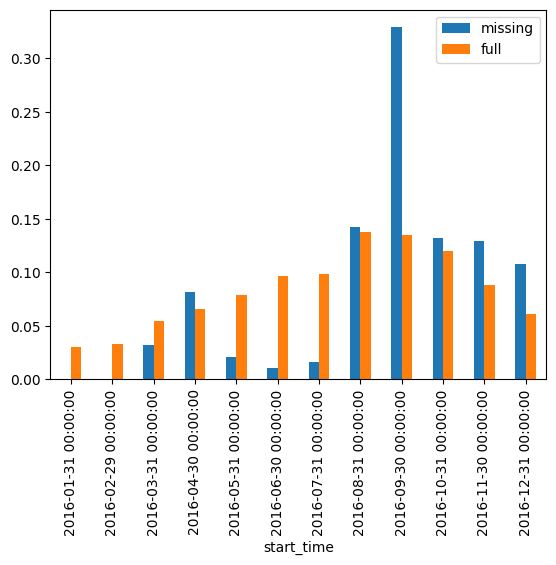

In [61]:
ax = combo.plot.bar()

Because the data does not seem to missing at random (inferred from the fact that september has significantly more missing data while there are other months of which the data is barely missing), and missing data is only 1% of the dataset, I am just replacing the missing data with `unknown` category.

In [62]:
df.fillna({'user_type': 'Unknown'}, inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247583 entries, 0 to 247583
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trip_duration            247583 non-null  int64         
 1   start_time               247583 non-null  datetime64[ns]
 2   stop_time                247583 non-null  datetime64[ns]
 3   start_station_id         247583 non-null  int64         
 4   start_station_name       247583 non-null  object        
 5   start_station_latitude   247583 non-null  float64       
 6   start_station_longitude  247583 non-null  float64       
 7   end_station_id           247583 non-null  int64         
 8   end_station_name         247583 non-null  object        
 9   end_station_latitude     247583 non-null  float64       
 10  end_station_longitude    247583 non-null  float64       
 11  bike_id                  247583 non-null  int64         
 12  user_type            

##### `gender`

Let's confirm that most unknown `gender` values correspond to `user_type = Customer`.

In [64]:
df.groupby(['user_type', 'gender']).count()['id']

user_type   gender
Customer    0          15470
            1             36
            2             15
Subscriber  0           4431
            1         176898
            2          50353
Unknown     1            262
            2            118
Name: id, dtype: int64

Because almost all customers have unknown `gender`, I won't delete them. Moving forward, we need to be aware that demographic analysis is only viable on subscribers.

##### `trip_duration`

This column had an unusually large max.

In [65]:
# creating an easier to interpret trip time column in minutes and hours
df['trip_minutes'] = round(df['trip_duration'] / 60, 2)
df['trip_hours'] = round(df['trip_duration']/(60**2),2)

df[['trip_duration', 'trip_minutes', 'trip_hours']].describe()

,trip_duration,trip_minutes,trip_hours
count,2.475830e+05,247583.000000,247583.000000
mean,8.856300e+02,14.760494,0.246006
std,3.593805e+04,598.967493,9.982797
min,6.100000e+01,1.020000,0.020000
25%,2.480000e+02,4.130000,0.070000
50%,3.900000e+02,6.500000,0.110000
75%,6.660000e+02,11.100000,0.180000
max,1.632981e+07,272163.470000,4536.060000


##### Observations:

- minimum trip length = 61 seconds
- maximum trip = 4,536 hours =189 days

According to the data dictionary, trips under 60 seconds were already assumed to be false starts/stops and were pruned.

For the max, Citi Bike policies state that the maximum length of a trip is 24 hours (or 86400 seconds).

I won't delete the longer trips, since it is possible these correspond to bike docking issues or users breaking the rules (which analysts might want to investigate). However, I will add a flag so that the analytics team can easily filter these out if desired.

In [66]:
# create a column to flag rides that do not comply with system protocols
df['valid_duration'] = df['trip_duration'].apply(lambda x: 0 if x > 86400 else 1).astype(bool)

Since we've dropped some data, let's reset our index and `id` columns

In [67]:
df.reset_index(drop=True, inplace=True)
df['id'] = df.index
df.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,id,age,trip_minutes,trip_hours,valid_duration
0,361,2016-02-01 00:31:18,2016-02-01 00:37:19,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24393,Subscriber,1975.0,1,0,41.0,6.02,0.10,True
1,297,2016-02-01 01:55:05,2016-02-01 02:00:02,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24394,Subscriber,1985.0,2,1,31.0,4.95,0.08,True
2,1155,2016-02-01 02:40:05,2016-02-01 02:59:20,3183,Exchange Place,40.716247,-74.033459,3210,Pershing Field,40.742677,-74.051789,24676,Subscriber,1976.0,1,2,40.0,19.25,0.32,True
3,1769,2016-02-01 05:11:28,2016-02-01 05:40:58,3214,Essex Light Rail,40.712774,-74.036486,3203,Hamilton Park,40.727596,-74.044247,24700,Subscriber,1974.0,2,3,42.0,29.48,0.49,True
4,935,2016-02-01 05:48:24,2016-02-01 06:03:59,3203,Hamilton Park,40.727596,-74.044247,3214,Essex Light Rail,40.712774,-74.036486,24639,Subscriber,1974.0,2,4,42.0,15.58,0.26,True


## Weather Data

In [68]:
df_weather = pd.read_csv('/Users/ethanenkhtur/Documents/Codecademy/bike-rental-starter-kit/data/newark_airport_2016.csv')
df_weather.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF2,WDF5,WSF2,WSF5
0,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2016-01-01,12.75,NaN,0.0,0.0,0.0,41,43,34,NaN,270,280.0,25.9,35.1
1,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2016-01-02,9.40,NaN,0.0,0.0,0.0,36,42,30,NaN,260,260.0,21.0,25.1
2,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2016-01-03,10.29,NaN,0.0,0.0,0.0,37,47,28,NaN,270,250.0,23.9,30.0
3,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2016-01-04,17.22,NaN,0.0,0.0,0.0,32,35,14,NaN,330,330.0,25.9,33.1
4,USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",2016-01-05,9.84,NaN,0.0,0.0,0.0,19,31,10,NaN,360,350.0,25.1,31.1


In [69]:
df_weather.describe()

,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF2,WDF5,WSF2,WSF5
count,366.000000,0.0,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,0.0,366.000000,364.000000,366.000000,364.000000
mean,9.429973,NaN,0.104945,0.098087,0.342623,57.196721,65.991803,48.459016,NaN,217.841530,228.269231,20.484426,26.801648
std,3.748174,NaN,0.307496,1.276498,2.078510,17.466981,18.606301,17.135790,NaN,102.548282,97.415777,6.848390,8.882610
min,2.460000,NaN,0.000000,0.000000,0.000000,8.000000,18.000000,0.000000,NaN,10.000000,10.000000,6.900000,10.100000
25%,6.765000,NaN,0.000000,0.000000,0.000000,43.000000,51.250000,35.000000,NaN,150.000000,150.000000,15.000000,19.900000
50%,8.720000,NaN,0.000000,0.000000,0.000000,56.000000,66.000000,47.000000,NaN,240.000000,260.000000,19.900000,25.100000
75%,11.410000,NaN,0.030000,0.000000,0.000000,74.000000,83.000000,64.000000,NaN,300.000000,300.000000,23.900000,31.100000
max,22.820000,NaN,2.790000,24.000000,20.100000,89.000000,99.000000,80.000000,NaN,360.000000,360.000000,48.100000,66.000000


### Cleaning and Transforming Weather Data

PGTM and TSUN are entirely missing, so they will be dropped. WDFx, WSFx = the highest x-minute wind. These are tough to match directly to our data since we don't know the time for that number, so it's better to stick with AWND for our wind speed variable.

Since all the data is from the same station, I will drop the station info.

In [70]:
df_weather.drop(['STATION','NAME','PGTM','TSUN', 'WDF2', 'WDF5', 'WSF2', 'WSF5'],axis=1, inplace=True)

In [71]:
df_weather.dtypes

DATE     object
AWND    float64
PRCP    float64
SNOW    float64
SNWD    float64
TAVG      int64
TMAX      int64
TMIN      int64
dtype: object

In [72]:
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'],yearfirst=True)

In [73]:
df_weather.dtypes

DATE    datetime64[ns]
AWND           float64
PRCP           float64
SNOW           float64
SNWD           float64
TAVG             int64
TMAX             int64
TMIN             int64
dtype: object

In [74]:
df_weather.describe()

,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
count,366,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2016-07-01 12:00:00,9.429973,0.104945,0.098087,0.342623,57.196721,65.991803,48.459016
min,2016-01-01 00:00:00,2.460000,0.000000,0.000000,0.000000,8.000000,18.000000,0.000000
25%,2016-04-01 06:00:00,6.765000,0.000000,0.000000,0.000000,43.000000,51.250000,35.000000
50%,2016-07-01 12:00:00,8.720000,0.000000,0.000000,0.000000,56.000000,66.000000,47.000000
75%,2016-09-30 18:00:00,11.410000,0.030000,0.000000,0.000000,74.000000,83.000000,64.000000
max,2016-12-31 00:00:00,22.820000,2.790000,24.000000,20.100000,89.000000,99.000000,80.000000
std,NaN,3.748174,0.307496,1.276498,2.078510,17.466981,18.606301,17.135790


No issues so far.

What about nulls?

In [75]:
df_weather.isnull().sum()

DATE    0
AWND    0
PRCP    0
SNOW    0
SNWD    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

Renaming the columns to make them more clear.

In [76]:
df_weather.columns = ['rec_date','avg_wind','prcp','snow_amt','snow_depth','tavg','tmax','tmin']

In [77]:
# create convenience binary columns for weather events
df_weather['rain'] = df_weather['prcp'].apply(lambda x: 1 if x > 0 else 0).astype(bool)
df_weather['snow'] = df_weather['snow_amt'].apply(lambda x: 1 if x > 0 else 0).astype(bool)

In [78]:
df_weather.head()

,rec_date,avg_wind,prcp,snow_amt,snow_depth,tavg,tmax,tmin,rain,snow
0,2016-01-01,12.75,0.0,0.0,0.0,41,43,34,False,False
1,2016-01-02,9.40,0.0,0.0,0.0,36,42,30,False,False
2,2016-01-03,10.29,0.0,0.0,0.0,37,47,28,False,False
3,2016-01-04,17.22,0.0,0.0,0.0,32,35,14,False,False
4,2016-01-05,9.84,0.0,0.0,0.0,19,31,10,False,False


#### Postgres Table

##### Date Dimension Table

Since use-case depends heavily on dates, it makes sense to create a dedicated date dimension table to simplify queries. Let's create one that has date, month name, day name, financial quarter, and weekend information.

In [79]:
# data starts on 2016-01-01
start = datetime.datetime(2016, 1, 1)

# generate the remaining days of the year
date_col = [start + datetime.timedelta(x) for x in range(366)]

# create a dataframe
df_date = pd.DataFrame(date_col, dtype='datetime64[ns]')
df_date.columns = ['full_date']
df_date.head()

,full_date
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05


In [80]:
# generate month and day names
df_date['month'] = df_date.full_date.apply(lambda x: x.month)
df_date['day'] = df_date.full_date.apply(lambda x: x.day)
df_date['month_name'] = df_date.full_date.apply(lambda x: x.strftime('%B'))
df_date['day_name'] = df_date.full_date.apply(lambda x: x.strftime('%A'))
df_date['weekend'] = df_date['day_name'].apply(lambda x: 1 if (x == 'Saturday' or x=='Sunday') else 0).astype(bool)
df_date.head()

,full_date,month,day,month_name,day_name,weekend
0,2016-01-01,1,1,January,Friday,False
1,2016-01-02,1,2,January,Saturday,True
2,2016-01-03,1,3,January,Sunday,True
3,2016-01-04,1,4,January,Monday,False
4,2016-01-05,1,5,January,Tuesday,False


In [81]:
# helper function to generate financial quarters
def get_quarter(x):
    if x <= 3:
        return 1
    elif x <= 6:
        return 2
    elif x <= 9:
        return 3
    else:
        return 4        

# add financial quarters
df_date['financial_qtr'] = df_date['month'].apply(get_quarter)
df_date.head()

,full_date,month,day,month_name,day_name,weekend,financial_qtr
0,2016-01-01,1,1,January,Friday,False,1
1,2016-01-02,1,2,January,Saturday,True,1
2,2016-01-03,1,3,January,Sunday,True,1
3,2016-01-04,1,4,January,Monday,False,1
4,2016-01-05,1,5,January,Tuesday,False,1


We'll want to use this date dimension table in joins, but joining on date-time columns is risky. Let's add a date key to each of our tables.

In [82]:
df_weather.dtypes

rec_date      datetime64[ns]
avg_wind             float64
prcp                 float64
snow_amt             float64
snow_depth           float64
tavg                   int64
tmax                   int64
tmin                   int64
rain                    bool
snow                    bool
dtype: object

In [83]:
df_date['date_key'] = df_date['full_date'].apply(lambda x: int(x.strftime('%Y%m%d').strip('-')))
df_weather['date_key'] = df_weather['rec_date'].apply(lambda x: int(x.strftime('%Y%m%d').strip('-')))
df['date_key'] = df['start_time'].apply(lambda x: int(x.strftime('%Y%m%d').strip('-')))

# take a look at the head and tail of the date table
df_date.head()

,full_date,month,day,month_name,day_name,weekend,financial_qtr,date_key
0,2016-01-01,1,1,January,Friday,False,1,20160101
1,2016-01-02,1,2,January,Saturday,True,1,20160102
2,2016-01-03,1,3,January,Sunday,True,1,20160103
3,2016-01-04,1,4,January,Monday,False,1,20160104
4,2016-01-05,1,5,January,Tuesday,False,1,20160105


In [84]:
df_date.tail()

,full_date,month,day,month_name,day_name,weekend,financial_qtr,date_key
361,2016-12-27,12,27,December,Tuesday,False,4,20161227
362,2016-12-28,12,28,December,Wednesday,False,4,20161228
363,2016-12-29,12,29,December,Thursday,False,4,20161229
364,2016-12-30,12,30,December,Friday,False,4,20161230
365,2016-12-31,12,31,December,Saturday,True,4,20161231


In [85]:
df_date.dtypes

full_date        datetime64[ns]
month                     int64
day                       int64
month_name               object
day_name                 object
weekend                    bool
financial_qtr             int64
date_key                  int64
dtype: object

##### Demographics Table

Let's create a table for storing demographic information.

In [86]:
# create a demographics table with all the unique demographics in the original dataset
trip_demo = df[['user_type', 'birth_year', 'gender', 'age']].drop_duplicates(subset=['user_type', 'birth_year', 'gender']).reset_index(drop=True)
trip_demo['trip_demo'] = trip_demo.index

# add the trip_demo key to a rides table
rides = df.merge(trip_demo, on=['user_type', 'birth_year', 'gender', 'age']).sort_values(by='id').reset_index(drop=True)

# drop the demographic info from rides
rides = rides.drop(['user_type', 'birth_year', 'gender', 'age'],axis=1)

rides.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,id,trip_minutes,trip_hours,valid_duration,date_key,trip_demo
0,361,2016-02-01 00:31:18,2016-02-01 00:37:19,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24393,0,6.02,0.10,True,20160201,0
1,297,2016-02-01 01:55:05,2016-02-01 02:00:02,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24394,1,4.95,0.08,True,20160201,1
2,1155,2016-02-01 02:40:05,2016-02-01 02:59:20,3183,Exchange Place,40.716247,-74.033459,3210,Pershing Field,40.742677,-74.051789,24676,2,19.25,0.32,True,20160201,2
3,1769,2016-02-01 05:11:28,2016-02-01 05:40:58,3214,Essex Light Rail,40.712774,-74.036486,3203,Hamilton Park,40.727596,-74.044247,24700,3,29.48,0.49,True,20160201,3
4,935,2016-02-01 05:48:24,2016-02-01 06:03:59,3203,Hamilton Park,40.727596,-74.044247,3214,Essex Light Rail,40.712774,-74.036486,24639,4,15.58,0.26,True,20160201,3


In [90]:
trip_demo.head()

,user_type,birth_year,gender,age,trip_demo
0,Subscriber,1975.0,1,41.0,0
1,Subscriber,1985.0,2,31.0,1
2,Subscriber,1976.0,1,40.0,2
3,Subscriber,1974.0,2,42.0,3
4,Subscriber,1984.0,2,32.0,4


Because I've created a new key, let's make sure that merging with the demographics table reproduces the original dataframe.

In [92]:
# first merge the two tables and
# - sort by ID to match df's sorting
# - reset the index to match df's index
# - drop the trip_demo join key
ridesmerge = rides.merge(trip_demo,on='trip_demo').sort_values(by='id').reset_index(drop=True).drop('trip_demo',axis=1)

# count the number of positions where ridesmerge is different from df
# note that NaN != NaN, so we also need to make sure at least one isn't NaN
(df.ne(ridesmerge) & (df.notna() | ridesmerge.notna())).sum()

age                        0
bike_id                    0
birth_year                 0
date_key                   0
end_station_id             0
end_station_latitude       0
end_station_longitude      0
end_station_name           0
gender                     0
id                         0
start_station_id           0
start_station_latitude     0
start_station_longitude    0
start_station_name         0
start_time                 0
stop_time                  0
trip_duration              0
trip_hours                 0
trip_minutes               0
user_type                  0
valid_duration             0
dtype: int64

In [93]:
# change the name of the trip_demo id column for the database
trip_demo.rename(columns={'trip_demo':'id'}, inplace=True)
trip_demo.head()

,user_type,birth_year,gender,age,id
0,Subscriber,1975.0,1,41.0,0
1,Subscriber,1985.0,2,31.0,1
2,Subscriber,1976.0,1,40.0,2
3,Subscriber,1974.0,2,42.0,3
4,Subscriber,1984.0,2,32.0,4
